# **Week 4: Delay Analysis – Airline and Weather**

In [0]:
import pandas as pd
output_path = "/Volumes/workspace/airlines/flight/cleaned_dataset.csv"
data = pd.read_csv(output_path)
display(data.head(10))

DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DayOfWeekNum,DayName
Thursday,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,3,Thursday
Thursday,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,3,Thursday
Thursday,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,3,Thursday
Thursday,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,3,Thursday
Thursday,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,3,Thursday
Thursday,2019-01-03,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25,14,16,2019-01-03 14:16:00,1,14,ISP-BWI,3,Thursday
Thursday,2019-01-03,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12,16,57,2019-01-03 16:57:00,1,16,ISP-BWI,3,Thursday
Thursday,2019-01-03,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,Long Island MacArthur Airport,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7,14,22,2019-01-03 14:22:00,1,14,ISP-FLL,3,Thursday
Thursday,2019-01-03,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,Long Island MacArthur Airport,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59,21,7,2019-01-03 21:07:00,1,21,ISP-MCO,3,Thursday
Thursday,2019-01-03,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,Long Island MacArthur Airport,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69,18,12,2019-01-03 18:12:00,1,18,ISP-MDW,3,Thursday


/home/spark-c00f793b-7b47-496a-b22a-d7/.ipykernel/2509/command-6952036790698232-7501329:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


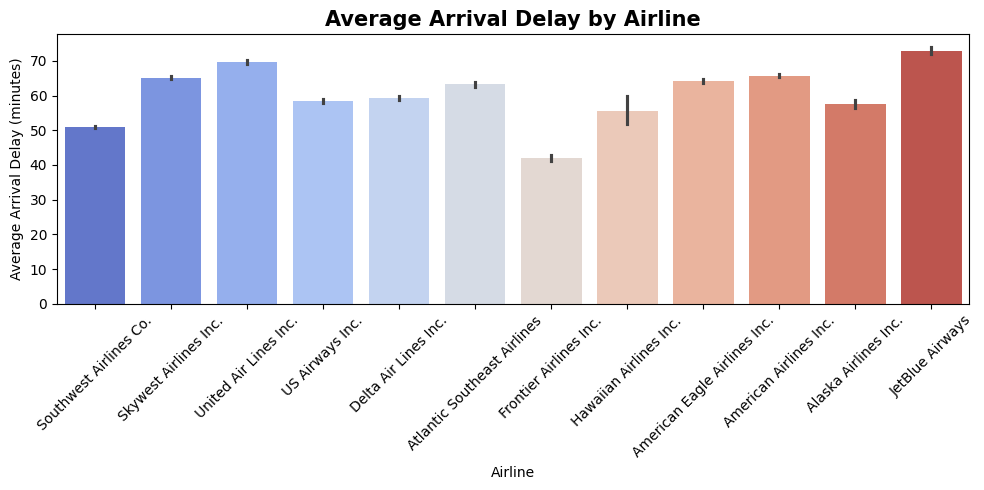


**Observation:**
- The airline with the highest average arrival delay is **JetBlue Airways** (**72.87** minutes).
- The airline with the lowest average arrival delay is **Frontier Airlines Inc.** (**41.97** minutes).
- The colorful bar plot highlights differences in punctuality across airlines.
- These insights can help identify which airlines are more reliable in terms of on-time arrivals.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
palette = sns.color_palette("coolwarm", len(data['Airline'].unique()))
sns.barplot(
    x='Airline', 
    y='ArrDelay', 
    data=data, 
    estimator='mean', 
    palette=palette
)
plt.title('Average Arrival Delay by Airline', fontsize=15, fontweight='bold')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

avg_delays = data.groupby('Airline')['ArrDelay'].mean().sort_values(ascending=False)
top_airline = avg_delays.index[0]
top_delay = avg_delays.iloc[0]
lowest_airline = avg_delays.index[-1]
lowest_delay = avg_delays.iloc[-1]

observation = f"""
**Observation:**
- The airline with the highest average arrival delay is **{top_airline}** (**{top_delay:.2f}** minutes).
- The airline with the lowest average arrival delay is **{lowest_airline}** (**{lowest_delay:.2f}** minutes).
- The colorful bar plot highlights differences in punctuality across airlines.
- These insights can help identify which airlines are more reliable in terms of on-time arrivals.
"""

display(Markdown(observation))

<Figure size 1200x700 with 0 Axes>

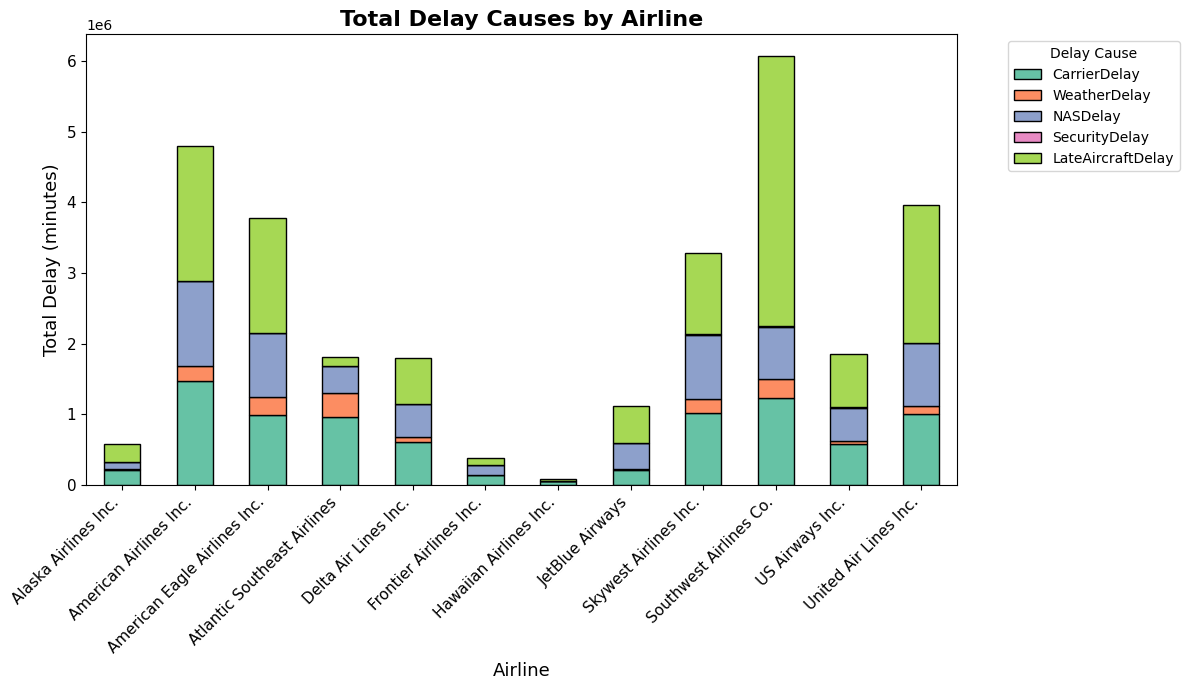


**Observation:**
- The stacked bar chart visualizes the total delay minutes for each airline, broken down by cause.
- **Southwest Airlines Co.** has the highest total delay, with **6075370** minutes.
- For **Southwest Airlines Co.**, the main cause of delay is **LateAircraftDelay** (**3822267** minutes).
- The distribution of delay causes varies by airline, highlighting operational and external factors affecting punctuality.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Define the delay columns
delay_cols = [
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]

delay_sum = data.groupby('Airline')[delay_cols].sum().reset_index()

plt.figure(figsize=(12, 7))
colors = sns.color_palette("Set2", n_colors=len(delay_cols))
delay_sum.set_index('Airline')[delay_cols].plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(12, 7),
    edgecolor='black'
)
plt.title('Total Delay Causes by Airline', fontsize=16, fontweight='bold')
plt.xlabel('Airline', fontsize=13)
plt.ylabel('Total Delay (minutes)', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Observation
top_airline = delay_sum.set_index('Airline')[delay_cols].sum(axis=1).idxmax()
top_total = delay_sum.set_index('Airline')[delay_cols].sum(axis=1).max()
main_cause = delay_sum.set_index('Airline').loc[top_airline, delay_cols].idxmax()
main_cause_val = delay_sum.set_index('Airline').loc[top_airline, delay_cols].max()

observation = f"""
**Observation:**
- The stacked bar chart visualizes the total delay minutes for each airline, broken down by cause.
- **{top_airline}** has the highest total delay, with **{top_total}** minutes.
- For **{top_airline}**, the main cause of delay is **{main_cause}** (**{main_cause_val}** minutes).
- The distribution of delay causes varies by airline, highlighting operational and external factors affecting punctuality.
"""

display(Markdown(observation))


Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepHour', 'DepMinute', 'DepDatetime', 'Month', 'Hour', 'Route',
       'DayOfWeekNum', 'DayName'],
      dtype='object')

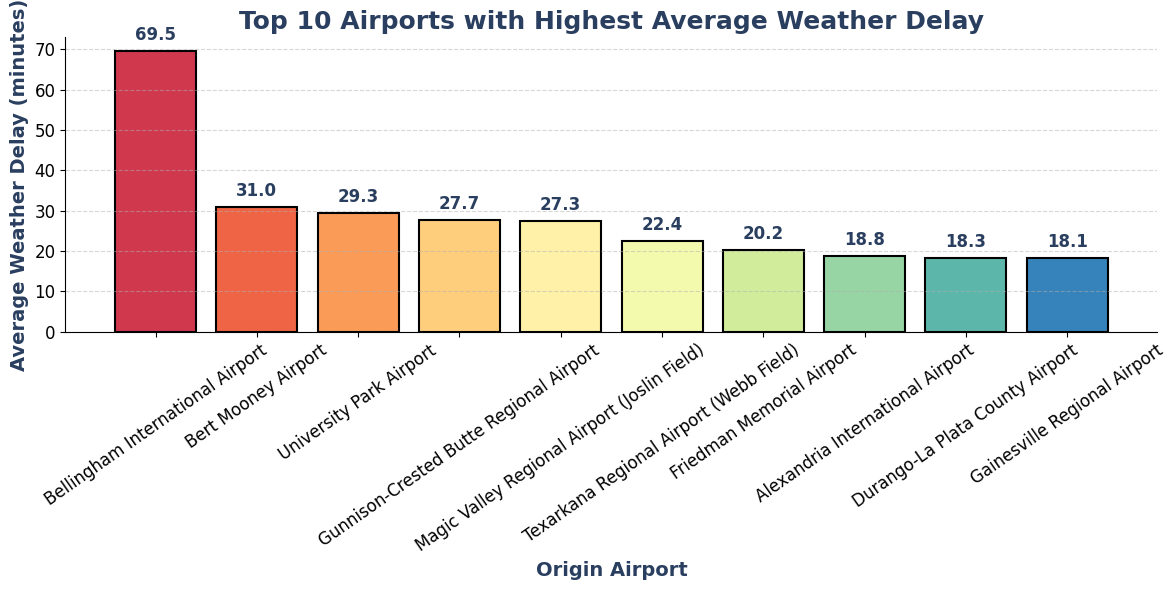


**Observation:**
- The airport with the highest average weather delay is **Bellingham International Airport** (**69.50** minutes).
- Weather delays vary significantly across airports, likely reflecting regional weather patterns and airport infrastructure.
- The colorful bar plot highlights which airports are most affected by weather-related disruptions.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
display(data.columns)
top_weather = (
    data.groupby('Org_Airport')['WeatherDelay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("Spectral", len(top_weather))
bars = ax.bar(
    top_weather.index,
    top_weather.values,
    color=colors,
    edgecolor='black',
    linewidth=1.5
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='#2a3f5f'
    )

ax.set_title('Top 10 Airports with Highest Average Weather Delay', fontsize=18, fontweight='bold', color='#2a3f5f')
ax.set_xlabel('Origin Airport', fontsize=14, fontweight='bold', color='#2a3f5f')
ax.set_ylabel('Average Weather Delay (minutes)', fontsize=14, fontweight='bold', color='#2a3f5f')
ax.tick_params(axis='x', labelrotation=35, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

top_airport = top_weather.index[0]
top_delay = top_weather.iloc[0]
observation = f"""
**Observation:**
- The airport with the highest average weather delay is **{top_airport}** (**{top_delay:.2f}** minutes).
- Weather delays vary significantly across airports, likely reflecting regional weather patterns and airport infrastructure.
- The colorful bar plot highlights which airports are most affected by weather-related disruptions.
"""

display(Markdown(observation))

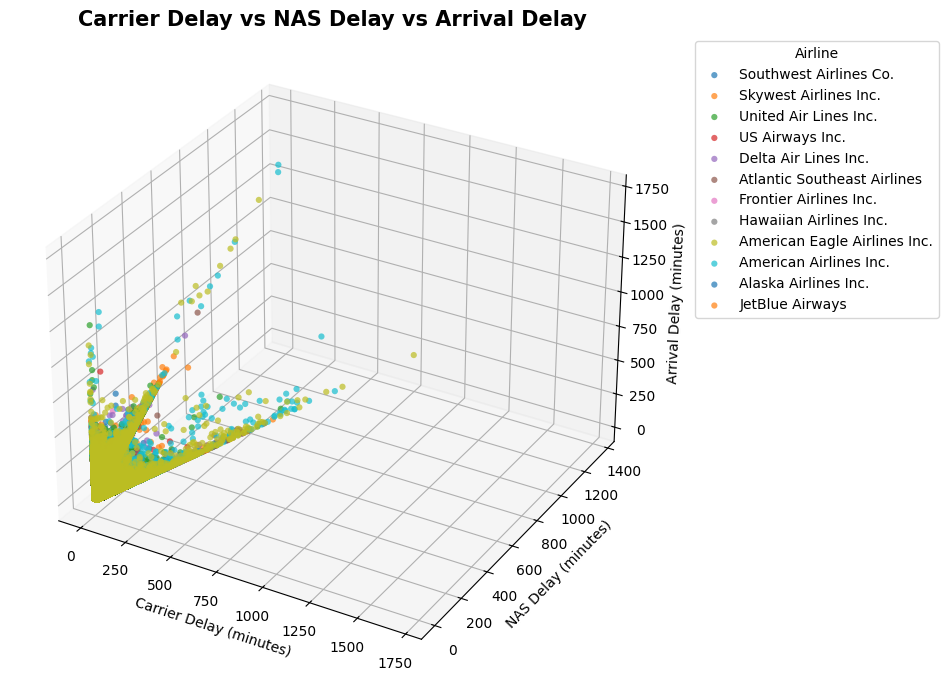


**Observation:**
- The 3D scatter plot visualizes the relationship between carrier-related delays, NAS delays, and arrival delays for individual flights.
- The correlation coefficient between Carrier Delay and NAS Delay is **-0.11**.
- This visualization helps reveal how combinations of delay types contribute to overall arrival delays, with color indicating airline.


In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
airlines = data['Airline'].unique()
colors = sns.color_palette('tab10', n_colors=len(airlines))
airline_color_map = dict(zip(airlines, colors))

for airline in airlines:
    subset = data[data['Airline'] == airline]
    ax.scatter(
        subset['CarrierDelay'],
        subset['NASDelay'],
        subset['ArrDelay'],
        label=airline,
        color=airline_color_map[airline],
        alpha=0.7,
        edgecolor='none'
    )

ax.set_title('Carrier Delay vs NAS Delay vs Arrival Delay', fontsize=15, fontweight='bold')
ax.set_xlabel('Carrier Delay (minutes)')
ax.set_ylabel('NAS Delay (minutes)')
ax.set_zlabel('Arrival Delay (minutes)')
ax.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

correlation = data[['CarrierDelay', 'NASDelay', 'ArrDelay']].corr().loc['CarrierDelay', 'NASDelay']
observation = f"""
**Observation:**
- The 3D scatter plot visualizes the relationship between carrier-related delays, NAS delays, and arrival delays for individual flights.
- The correlation coefficient between Carrier Delay and NAS Delay is **{correlation:.2f}**.
- This visualization helps reveal how combinations of delay types contribute to overall arrival delays, with color indicating airline.
"""

display(Markdown(observation))

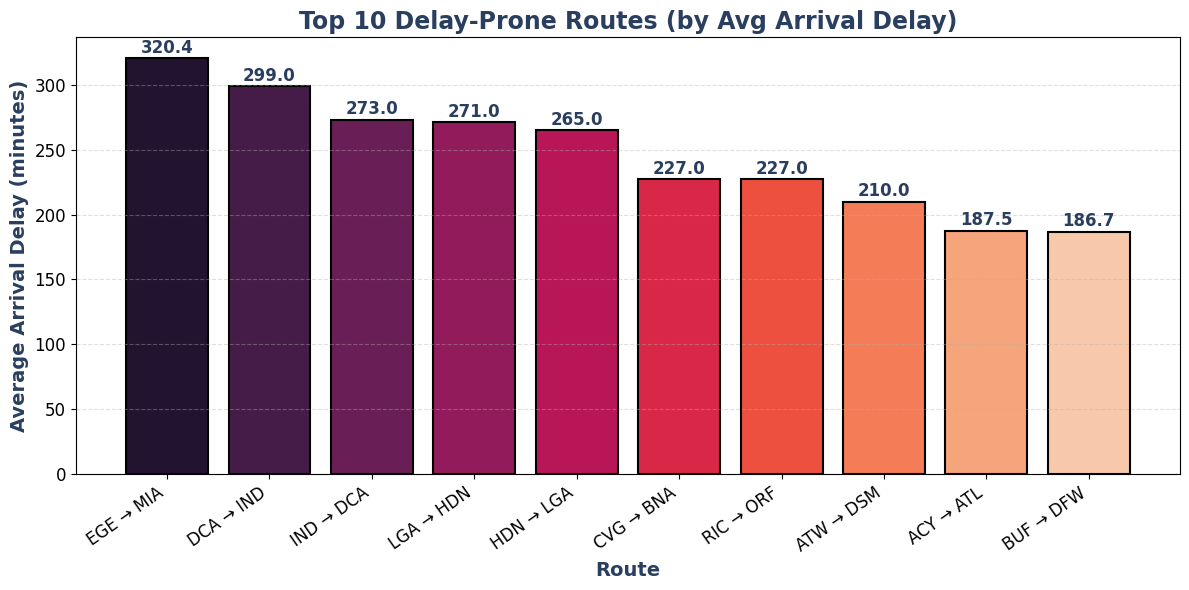


**Observation:**
- The route with the highest average arrival delay is **EGE → MIA** (**320.44** minutes).
- Among the top 10, the 'least' delay-prone route is **BUF → DFW** (**186.71** minutes).
- These routes may be affected by congestion, weather, or operational bottlenecks.
- Focusing on these high-delay routes can help airlines and airports target improvements for better punctuality.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Create ROUTE column
data['ROUTE'] = data['Origin'].astype(str) + ' → ' + data['Dest'].astype(str)

# Calculate top 10 delay-prone routes by average arrival delay
top_routes = (
    data.groupby('ROUTE')['ArrDelay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12,6))
colors = sns.color_palette("rocket", len(top_routes))
bars = plt.bar(top_routes.index, top_routes.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Top 10 Delay-Prone Routes (by Avg Arrival Delay)', fontsize=17, fontweight='bold', color='#2a3f5f')
plt.ylabel('Average Arrival Delay (minutes)', fontsize=14, fontweight='bold', color='#2a3f5f')
plt.xlabel('Route', fontsize=14, fontweight='bold', color='#2a3f5f')
plt.xticks(rotation=35, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#2a3f5f')

plt.tight_layout()
plt.show()

# Observation
worst_route = top_routes.index[0]
worst_delay = top_routes.iloc[0]
best_of_top = top_routes.index[-1]
best_delay = top_routes.iloc[-1]
observation = f"""
**Observation:**
- The route with the highest average arrival delay is **{worst_route}** (**{worst_delay:.2f}** minutes).
- Among the top 10, the 'least' delay-prone route is **{best_of_top}** (**{best_delay:.2f}** minutes).
- These routes may be affected by congestion, weather, or operational bottlenecks.
- Focusing on these high-delay routes can help airlines and airports target improvements for better punctuality.
"""

display(Markdown(observation))

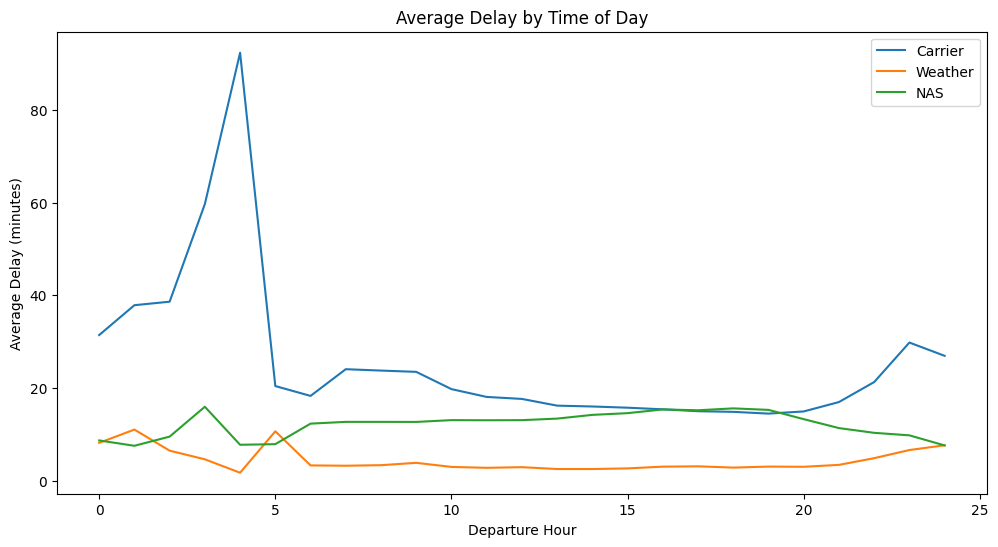

<Figure size 1200x600 with 0 Axes>

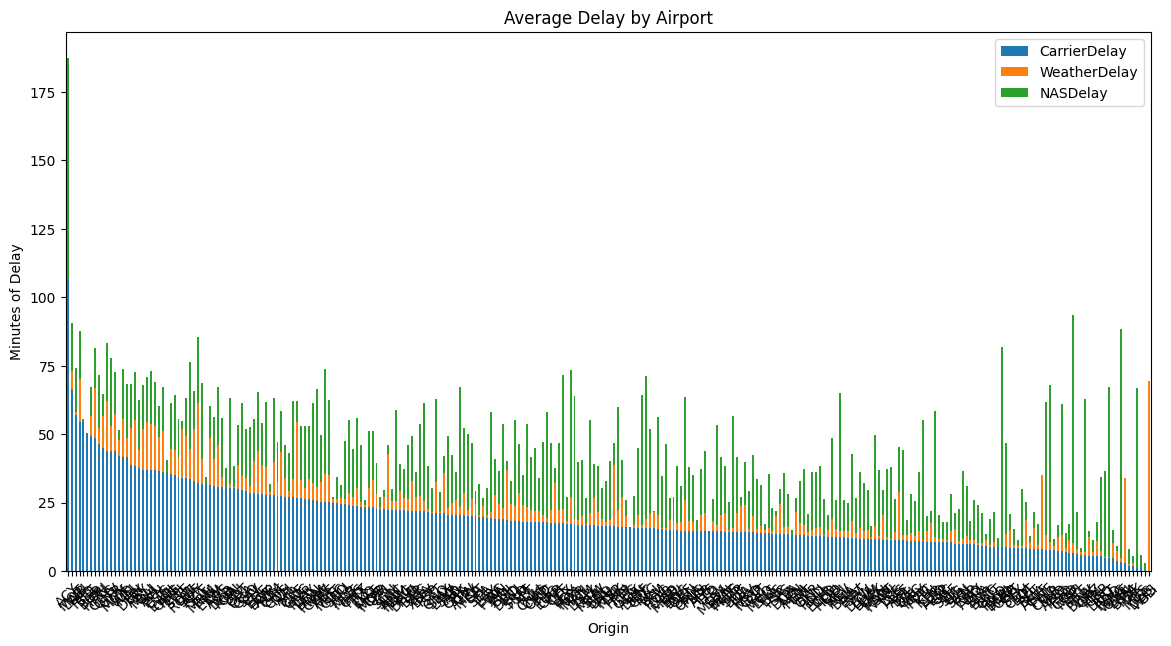

In [0]:
hourly_delays = data.groupby('DepHour')[['CarrierDelay', 'WeatherDelay', 'NASDelay']].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_delays, x='DepHour', y='CarrierDelay', label='Carrier')
sns.lineplot(data=hourly_delays, x='DepHour', y='WeatherDelay', label='Weather')
sns.lineplot(data=hourly_delays, x='DepHour', y='NASDelay', label='NAS')
plt.title("Average Delay by Time of Day")
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay (minutes)")
plt.legend()
plt.show()
airport_delays = data.groupby('Origin')[['CarrierDelay','WeatherDelay','NASDelay']].mean().sort_values(by='CarrierDelay', ascending=False).reset_index()
plt.figure(figsize=(12,6))
airport_delays.set_index('Origin')[['CarrierDelay','WeatherDelay','NASDelay']].plot(kind='bar', stacked=True, figsize=(14,7))
plt.title("Average Delay by Airport")
plt.ylabel("Minutes of Delay")
plt.xticks(rotation=45)
plt.show()

/home/spark-c00f793b-7b47-496a-b22a-d7/.ipykernel/2509/command-6952036790698246-1496612217:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('rainbow')


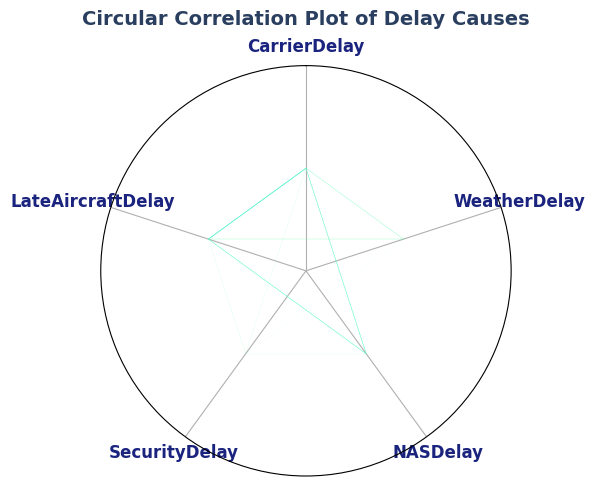


**Observation:**
- The circular plot visualizes pairwise correlations between different delay causes.
- The strongest correlation is between **CarrierDelay** and **LateAircraftDelay** (**-0.18**).
- Thicker and more vibrant lines indicate stronger correlations.
- This visualization highlights which delay types are most interrelated, aiding targeted interventions.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

corr_matrix = data[delay_cols].corr()

import numpy as np

corr_pairs = corr_matrix.where(~np.eye(corr_matrix.shape[0],dtype=bool)).stack().reset_index()
corr_pairs.columns = ['Cause1', 'Cause2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Correlation'].notnull()]

plt.figure(figsize=(6,6))  # Minimized chart size
angles = np.linspace(0, 2 * np.pi, len(delay_cols), endpoint=False).tolist()
angles += angles[:1]
labels = delay_cols + [delay_cols[0]]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels[:-1], fontsize=12, fontweight='bold', color='#1a237e')
plt.yticks([])

# Use a vibrant colormap for more attractive lines
cmap = plt.cm.get_cmap('rainbow')
norm = plt.Normalize(-1, 1)

for idx, row in corr_pairs.iterrows():
    i = delay_cols.index(row['Cause1'])
    j = delay_cols.index(row['Cause2'])
    angle_i = angles[i]
    angle_j = angles[j]
    color = cmap(norm(row['Correlation']))
    ax.plot([angle_i, angle_j], [1, 1], color=color, linewidth=2.5*abs(row['Correlation']), alpha=0.85)

ax.set_title('Circular Correlation Plot of Delay Causes', fontsize=14, fontweight='bold', color='#2a3f5f', y=1.08)
plt.tight_layout()
plt.show()

# Observation
max_corr = corr_matrix.where(~corr_matrix.isna() & (corr_matrix != 1)).abs().unstack().sort_values(ascending=False).drop_duplicates().head(1)
cause1, cause2 = max_corr.index[0]
corr_val = corr_matrix.loc[cause1, cause2]

observation = f"""
**Observation:**
- The circular plot visualizes pairwise correlations between different delay causes.
- The strongest correlation is between **{cause1}** and **{cause2}** (**{corr_val:.2f}**).
- Thicker and more vibrant lines indicate stronger correlations.
- This visualization highlights which delay types are most interrelated, aiding targeted interventions.
"""

display(Markdown(observation))

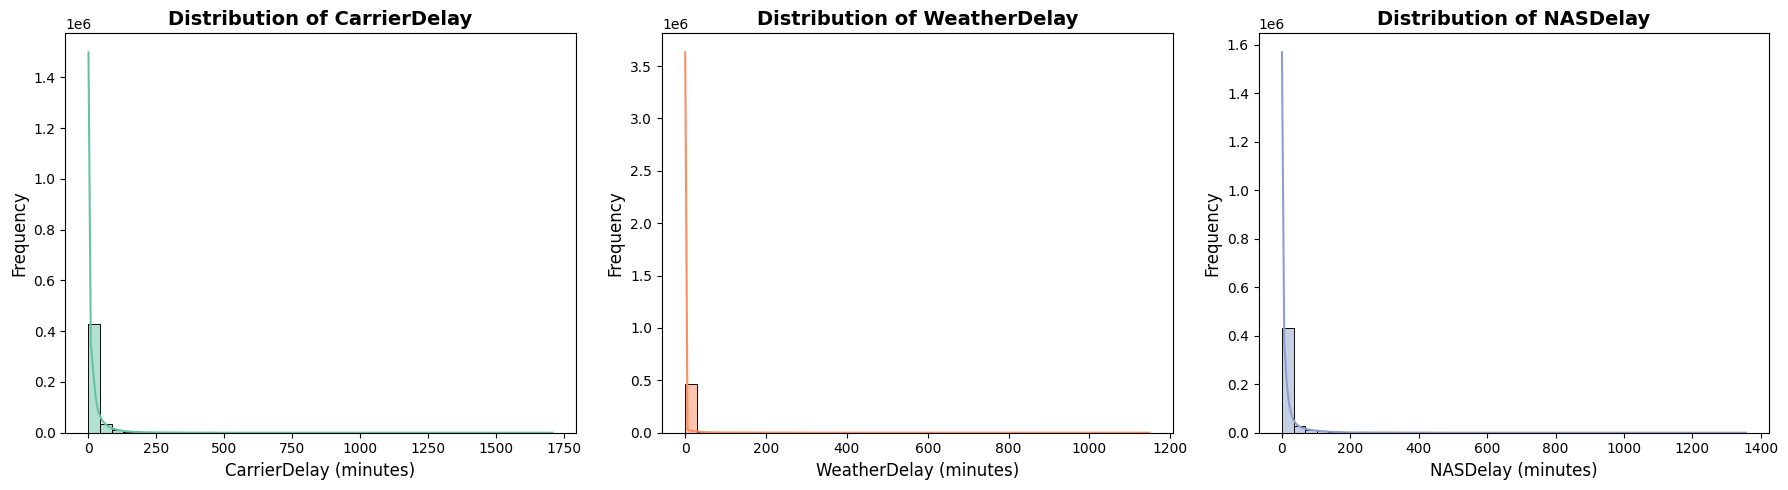


**Observation:**
- The histograms show the distribution of carrier, weather, and NAS delays for all flights.
- **CarrierDelay**: Mean = **17.42** min, Median = **2.00** min, Std = **39.42** min
- **WeatherDelay**: Mean = **3.15** min, Median = **0.00** min, Std = **19.50** min
- **NASDelay**: Mean = **13.60** min, Median = **1.00** min, Std = **31.45** min

- These plots help identify the typical range and variability of each delay type, as well as the presence of outliers or skewness.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, delay in enumerate(delay_types):
    sns.histplot(
        data[delay], 
        bins=40, 
        kde=True, 
        color=sns.color_palette('Set2')[i], 
        edgecolor='black', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {delay}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{delay} (minutes)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

analysis = ""
for delay in delay_types:
    mean = data[delay].mean()
    median = data[delay].median()
    std = data[delay].std()
    analysis += (
        f"- **{delay}**: Mean = **{mean:.2f}** min, Median = **{median:.2f}** min, Std = **{std:.2f}** min\n"
    )

display(Markdown(f"""
**Observation:**
- The histograms show the distribution of carrier, weather, and NAS delays for all flights.
{analysis}
- These plots help identify the typical range and variability of each delay type, as well as the presence of outliers or skewness.
"""))